<a href="https://colab.research.google.com/github/itzaamer/Airplane-Accident-Severity---Case-study--1/blob/main/Airplane_Accident_Severity_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost --upgrade

     |████████████████████████████████| 173.6 MB 8.8 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import pickle
import xgboost
from xgboost import XGBClassifier
import xgboost.compat
from xgboost.compat import XGBoostLabelEncoder
import matplotlib.pyplot as plt
import re
import time
import warnings
from pickle import load
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from pickle import load
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import xgboost
from scipy.sparse import hstack
print(xgboost.compat.__file__)
print(xgboost.compat.XGBoostLabelEncoder)

/usr/local/lib/python3.7/dist-packages/xgboost/compat.py
<class 'xgboost.compat.XGBoostLabelEncoder'>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings

warnings.filterwarnings("ignore")

<h1>Function-1

1. Should include entire pipeline, from data preprocessing to making final predictions.
2. It should take in raw data as input.
3. It should return predictions for your input. Here the input can be a single point or a set of points.
       def final_fun_1(X):
          .....
          .....
          .....
          you will use the best model that you found out with your experiments
          return predictions made on X ( Raw Data)

In [ ]:
def final_fun_1(input):
    """this function predicts the final o/p class label"""     
    
    
    """Doing Feature Engineering First Part"""
    input['Mean_of_Numerical_column'] = input[['Total_Safety_Complaints','Cabin_Temperature','Adverse_Weather_Metric','Turbulence_In_gforces','Max_Elevation','Safety_Score']].mean(axis=1)
    input['Median_of_Numerical_column'] = input[['Total_Safety_Complaints','Cabin_Temperature','Adverse_Weather_Metric','Turbulence_In_gforces','Max_Elevation','Safety_Score']].median(axis=1)
    input['Std_dev_of_Numerical_column'] = input[['Total_Safety_Complaints','Cabin_Temperature','Adverse_Weather_Metric','Turbulence_In_gforces','Max_Elevation','Safety_Score']].std(axis=1)
    input['max_of_Numerical_column'] = input[['Total_Safety_Complaints','Cabin_Temperature','Adverse_Weather_Metric','Turbulence_In_gforces','Max_Elevation','Safety_Score']].max(axis=1)
    input['min_of_Numerical_column'] = input[['Total_Safety_Complaints','Cabin_Temperature','Adverse_Weather_Metric','Turbulence_In_gforces','Max_Elevation','Safety_Score']].min(axis=1)    
    input['Cabin_Temperature_kelvin'] = (input['Cabin_Temperature'] - 32) * 5/9 + 273.15      
    
    # Handling the numerical feature:
    numerical = ['Total_Safety_Complaints','Control_Metric','Cabin_Temperature','Adverse_Weather_Metric','Turbulence_In_gforces','Max_Elevation','Safety_Score','Mean_of_Numerical_column','Median_of_Numerical_column','Std_dev_of_Numerical_column','max_of_Numerical_column','min_of_Numerical_column','Cabin_Temperature_kelvin']


    """Load the scalar """
    scaler = load(open('/content/drive/MyDrive/Case study/scaler.pkl', 'rb'))
    for i in numerical:
      input[i]= scaler.transform(input[i].values.reshape(-1,1))
    
     
    # Handling the categorical features:
    

    """Load the Encoder """
    encoder = load(open('/content/drive/MyDrive/Case study/encoder.pkl', 'rb'))
    encoder1 = load(open('/content/drive/MyDrive/Case study/encoder1.pkl', 'rb'))
    encoder2 = load(open('/content/drive/MyDrive/Case study/encoder2.pkl', 'rb'))
    acc =encoder.transform(input['Accident_Type_Code'].values.reshape(-1,1))
    days =encoder1.transform(input['Days_Since_Inspection'].values.reshape(-1,1))
    vio =encoder2.transform(input['Violations'].values.reshape(-1,1))
    test_data = hstack((input[numerical],acc,days,vio))

    
    """Load the Model """
    model = pickle.load(open('/content/drive/MyDrive/Case study/Xgboost_model.pkl', 'rb'))
    output = model.predict(test_data) 
    return output     

In [ ]:
input_data=pd.read_csv('/content/drive/MyDrive/Case study/test.csv')
test1 = final_fun_1(input_data[:10])
test1

array([2, 2, 2, 2, 2, 0, 3, 2, 2, 2])

In [ ]:
input_data=pd.read_csv('/content/drive/MyDrive/Case study/test.csv')
test1 = final_fun_1(input_data[:100])
test1

array([2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       0, 2, 1, 0, 3, 3, 2, 2, 1, 0, 2, 3, 2, 0, 2, 2, 0, 3, 2, 3, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 0, 2, 0, 3, 2, 2, 0, 0, 2])

In [ ]:
input_data=pd.read_csv('/content/drive/MyDrive/Case study/test.csv')
test = final_fun_1(input_data[:])
test

array([2, 2, 2, ..., 2, 1, 2])

In [ ]:
input_data["Class"] = test
input_data.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Class
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1,2
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10,2
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14,2
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17,2
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21,2


In [ ]:
input_data["Class"].value_counts()

2    1741
0     419
3     283
1      57
Name: Class, dtype: int64

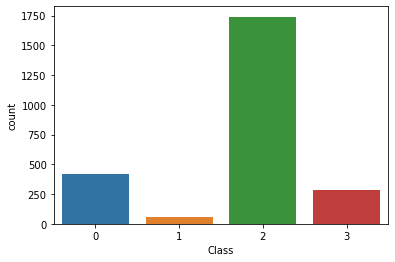

In [ ]:
sns.countplot(x=input_data['Class'],data=input_data)

<h1>Function-2

1. Should include entire pipeline, from data preprocessing to making final predictions.
2. It should take in raw data as input along with its target values.
3. It should return the metric value that you are judging your models on.
          def final_fun_2(X,Y):
              .....
              .....
              .....
              you will use the best model that you found out with your experiments
             return final_metric computed on X ( Raw Data) and Y (target variable)

In [ ]:
def final_fun_2(X_train,X_test,y_train,y_test):
    '''this function calculates the performance metric for given train and test data'''
    
    """Load the Model """
    model = pickle.load(open('/content/drive/MyDrive/Case study/Xgboost_model.pkl', 'rb'))
    model.fit(X_train,y_train)    
    pred = model.predict_proba(X_test)
    vd_preds = np.argmax(pred,axis=1)
    return confusion_matrix(y_test,vd_preds)

In [ ]:
final_fun_1(input_data)

array([0, 0, 0, ..., 3, 1, 1])

In [ ]:
input_data=pd.read_csv('/content/drive/MyDrive/Case study/test.csv')
X_train, X_test, y_train, y_test = train_test_split(input_data,final_fun_1(input_data), test_size=0.25,stratify=final_fun_1(input_data),random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
final_fun_2(X_train,X_test,y_train,y_test)

(1875, 17) (625, 17) (1875,) (625,)


array([[ 93,   2,  10,   0],
       [  4,   9,   2,   0],
       [  7,   0, 418,   1],
       [  5,   0,   5,  69]])